<a href="https://colab.research.google.com/github/Atkiya/CSE475/blob/main/Lab/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing libraries

In [13]:
!pip -q install ucimlrepo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo
import graphviz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading dataset

In [15]:
mushroom = fetch_ucirepo(id=73)
X = mushroom.data.features
y = mushroom.data.targets

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (8124, 22)
Target shape: (8124, 1)


parsing dataset into dataframe, checking missing values, and target distribution

In [17]:
df = pd.concat([X, y], axis=1)

print("First 5 rows:")
print(df.head())
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTotal missing values: ")
print(df.isnull().sum().sum())

print("\nTarget Distribution:")
print(y.value_counts())

First 5 rows:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p         

Feature analysis

In [18]:
print("Unique Values per Feature:")
for col in X.columns:
    unique_count = X[col].nunique()
    print(f"{col:25s}: {unique_count} unique values")

Unique Values per Feature:
cap-shape                : 6 unique values
cap-surface              : 4 unique values
cap-color                : 10 unique values
bruises                  : 2 unique values
odor                     : 9 unique values
gill-attachment          : 2 unique values
gill-spacing             : 2 unique values
gill-size                : 2 unique values
gill-color               : 12 unique values
stalk-shape              : 2 unique values
stalk-root               : 4 unique values
stalk-surface-above-ring : 4 unique values
stalk-surface-below-ring : 4 unique values
stalk-color-above-ring   : 9 unique values
stalk-color-below-ring   : 9 unique values
veil-type                : 1 unique values
veil-color               : 4 unique values
ring-number              : 3 unique values
ring-type                : 5 unique values
spore-print-color        : 9 unique values
population               : 6 unique values
habitat                  : 7 unique values


handing missing values

In [19]:
for col in X.columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

In [20]:
print(X.isnull().sum())
print("Total missing values: ", X.isnull().sum().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Total missing values:  0


handling categoricals

In [21]:
le = LabelEncoder()

X_encoded = X.copy()
for col in X_encoded.columns:
    X_encoded[col] = le.fit_transform(X_encoded[col])

y_encoded = le.fit_transform(y.values)

print(f"Encoded X shape: {X_encoded.shape}")
print("\nFirst 5 rows of encoded features:")
print(X_encoded.head())
print(f"Encoded X shape: {y_encoded.shape}")
print("\nFirst 5 rows of encoded target:")
print(y_encoded[:5])

Encoded X shape: (8124, 22)

First 5 rows of encoded features:
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7             

#EDA

Target Distribution barchart

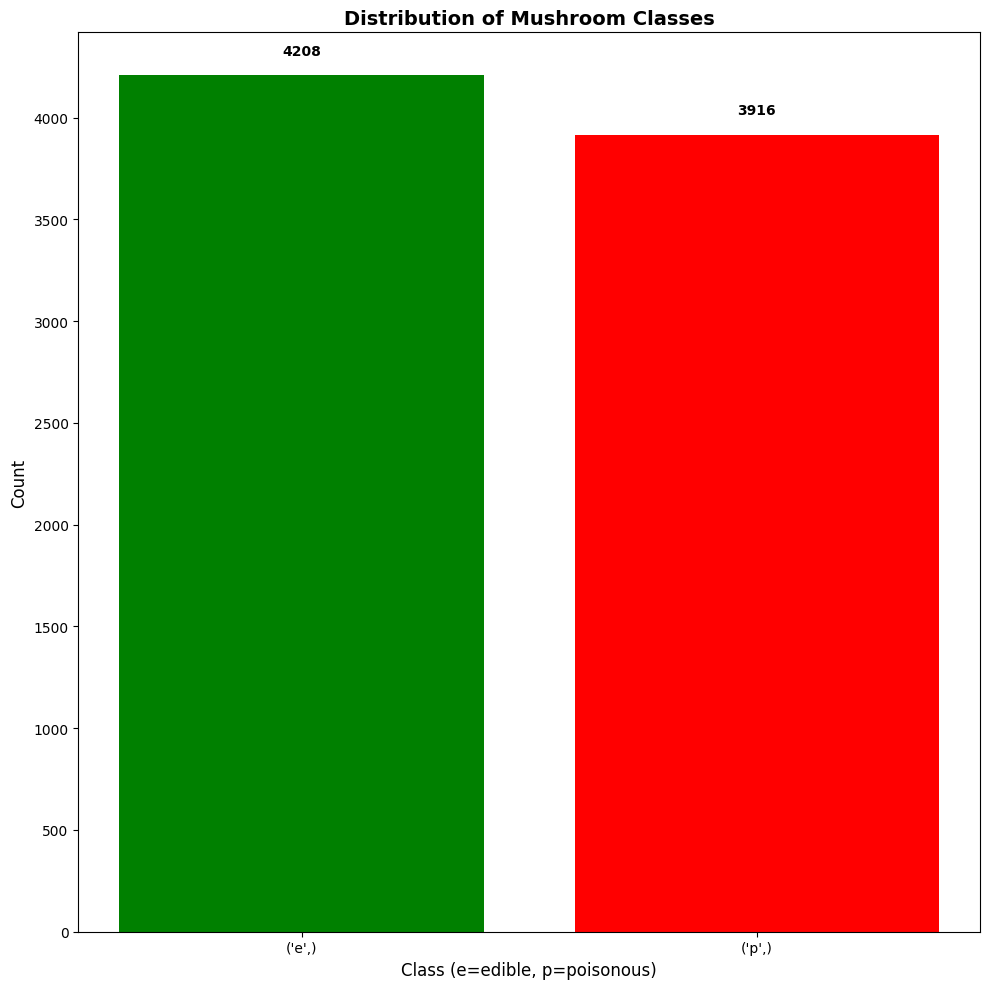

In [22]:
plt.figure(figsize=(10, 10))
labels = [str(x) for x in y.value_counts().index]
plt.bar(labels, y.value_counts().values, color=['green', 'red'], alpha=1)
plt.xlabel('Class (e=edible, p=poisonous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Mushroom Classes', fontsize=14, fontweight='bold')
for i, v in enumerate(y.value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()